In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.shape

(28242, 7)

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [12]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [13]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
        

In [14]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [15]:
df=df.drop(to_drop)

<Axes: xlabel='count', ylabel='Area'>

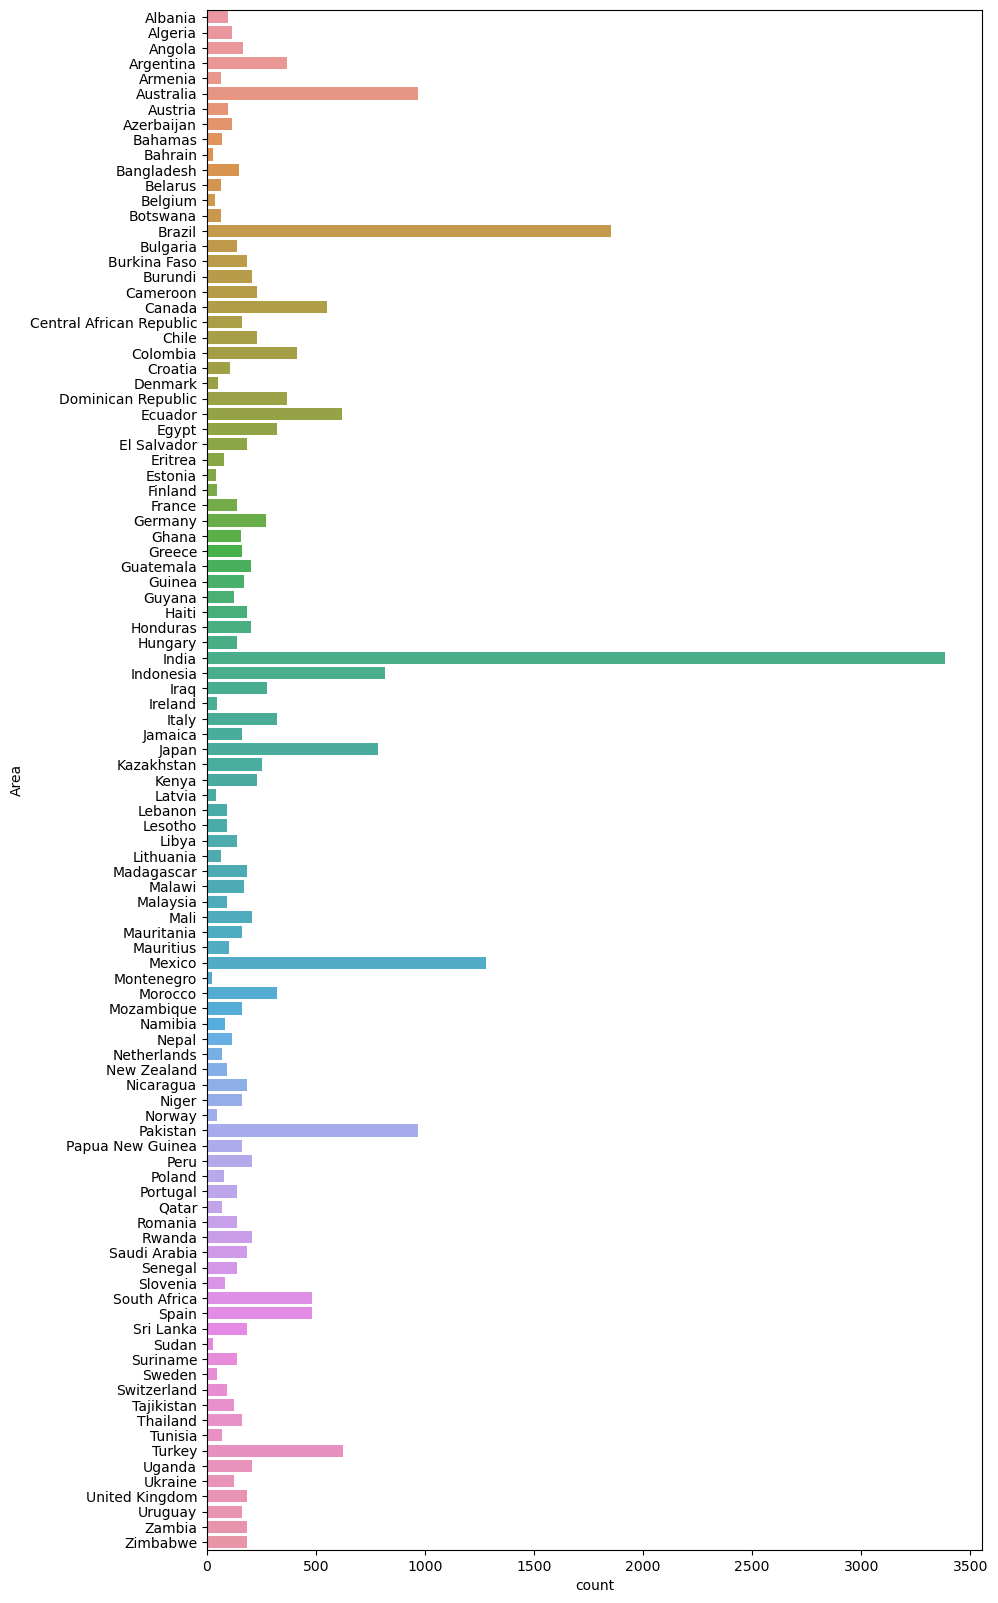

In [16]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [20]:
country = (df['Area'].unique())

In [21]:
for state in country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [22]:
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

<Axes: >

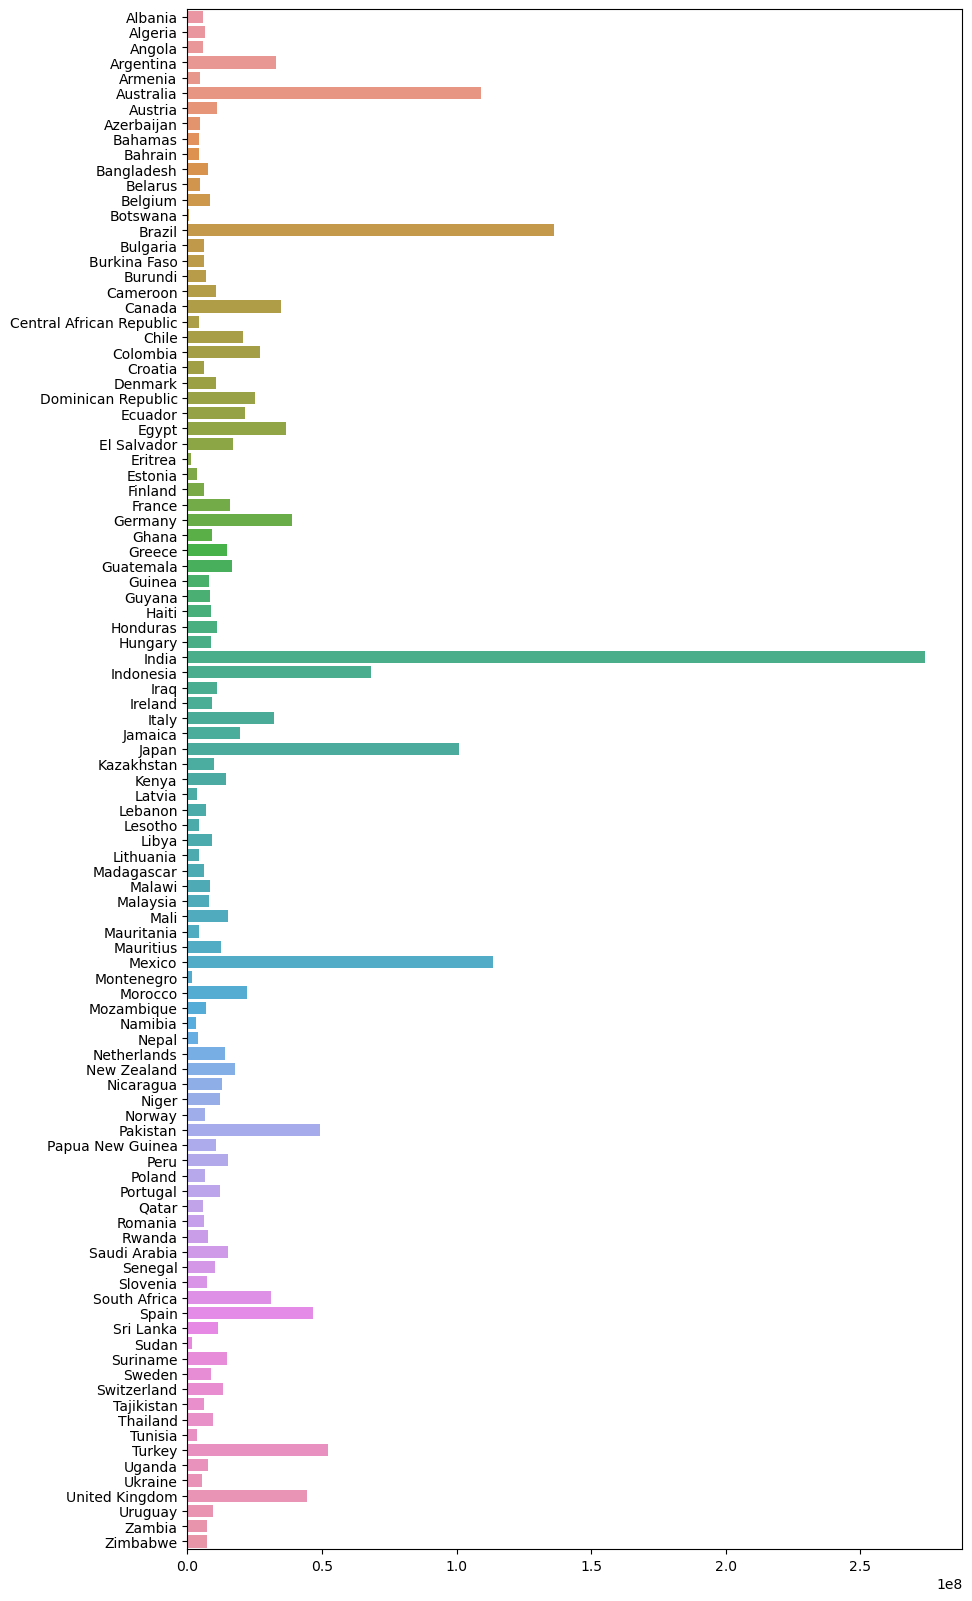

In [23]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country )

In [27]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item'>

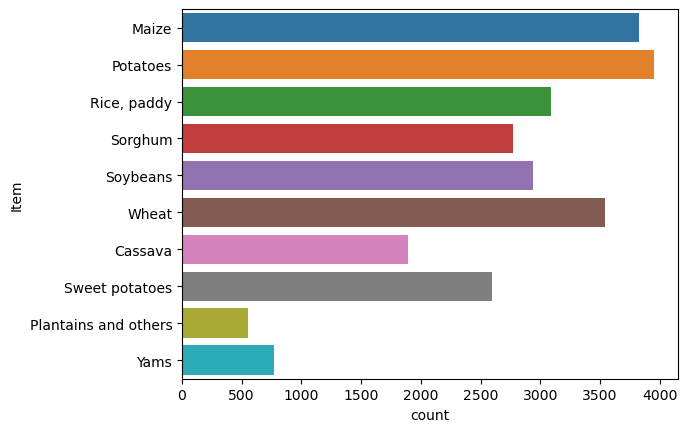

In [28]:
sns.countplot(y=df['Item'])

In [33]:
crops=(df['Item'].unique())

In [34]:
len(crops)

10

In [37]:
yield_per_item = []
for crop in crops:
    yield_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [38]:
yield_per_item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

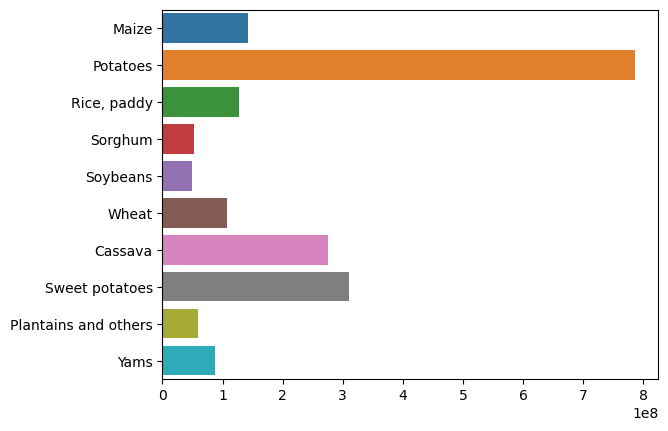

In [39]:
sns.barplot(y=crops,x=yield_per_item)

In [41]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [42]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [44]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(20745, 6)

In [50]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
345,2010,1010.0,40.00,24.44,Angola,Cassava
26405,2006,1622.0,41220.00,27.92,Thailand,Soybeans
27032,2010,593.0,38554.69,13.80,Turkey,Maize
24736,1996,495.0,19508.00,15.23,South Africa,Sorghum
6053,2010,537.0,61050.00,9.47,Canada,Wheat
...,...,...,...,...,...,...
19986,2006,758.0,50891.95,20.30,Mexico,Sweet potatoes
6994,2004,1113.0,2174.00,10.06,Croatia,Wheat
27921,1995,1020.0,716.00,21.86,Zambia,Wheat
13777,2009,1083.0,28707.01,27.82,India,Sorghum


In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [53]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

In [54]:
preprocessor=ColumnTransformer(
transformers=[
    ('onehotencoder',ohe,[4,5]),
    ('standrization',scaler,[0,1,2,3])
],
remainder='passthrough'
)

In [55]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [57]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.fit_transform(X_test)

In [58]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [65]:
models={
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Knr':KNeighborsRegressor(),
    'rg':Ridge(),
    'dtr':DecisionTreeRegressor()
}

for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred=mod.predict(X_test_dummy)

    print(f"{name} MSE:{mean_squared_error(y_test,y_pred)} Score{r2_score(y_test,y_pred)}")

lr MSE:1821773123.8646162 Score0.7486478323951036


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910889.96875, tolerance: 14819338848.544035
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE:1822352597.4122243 Score0.7485678817523188
Knr MSE:123813862.01016386 Score0.982917256716484
rg MSE:1822630361.8565397 Score0.748529558267222
dtr MSE:432489616.43396956 Score0.9403289020277769


In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 20000.,  15838.,  71878., ...,  52692.,   9621., 279000.])

In [69]:
 def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
     features=np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])

     transformed_features=preprocessor.transform(features)
     predicted_value=dtr.predict(transformed_features).reshape(1,-1)
     return predicted_value[0]

In [68]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
345,2010,1010.0,40.00,24.44,Angola,Cassava
26405,2006,1622.0,41220.00,27.92,Thailand,Soybeans
27032,2010,593.0,38554.69,13.80,Turkey,Maize
24736,1996,495.0,19508.00,15.23,South Africa,Sorghum
6053,2010,537.0,61050.00,9.47,Canada,Wheat
...,...,...,...,...,...,...
19986,2006,758.0,50891.95,20.30,Mexico,Sweet potatoes
6994,2004,1113.0,2174.00,10.06,Croatia,Wheat
27921,1995,1020.0,716.00,21.86,Zambia,Wheat
13777,2009,1083.0,28707.01,27.82,India,Sorghum


In [70]:
Year=2010
average_rain_fall_mm_per_year=1010.0
pesticides_tonnes=40.00
avg_temp=24.44
Area='Angola'	
Item='Cassava'
 
result=prediction(Year	,average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp,	Area,	Item)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
result

array([20000.])

In [72]:
import pickle

In [73]:
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))